Name: Jay Goyal

Roll no.: C017

Semester: VI

Program: B.Tech

Branch: EXTC

Date of performance: 12th March

Date of Submission: 19th March

Experiment Number: 7

Aim:


a. To write a program in PYTHON to perform morphological dilation and erosion on an image

b. To write a program in PYTHON to perform morphological opening and closing on an image


Theory:

Dilation

Dilation is defined as follows 𝐴⊕𝐵={ 𝑍|[(𝐵̂𝑧)∩𝐴]∈𝐴}

In the above equation, A is the image and B is the structuring element. In the above equation, (𝐵̂𝑧) means taking reflection of B about its origin and shifting it by Z. Hence dilation of A with B is set of all displacements, Z, such that (𝐵̂𝑧) and 𝐴 overlap by at least one element

Erosion

𝐴⊝𝐵={ 𝑍|(𝐵̂𝑧)∈𝐴}

This indicates that the erosion of A by B is set of all points that B, translated (shifted by Z), is a subset of A that is B is entirely contained within A. Erosion reduces the number of pixels from the object boundary.

Opening

Morphological opening of an image is basically erosion followed by dilation 𝐴∘𝐵=𝑂𝑃𝐸𝑁(𝐴,𝐵)=𝐷(𝐸(𝐴))

Closing

Morphological opening of an image is basically dilation followed by erosion 𝐴∙𝐵=𝐶𝐿𝑂𝑆𝐸(𝐴,𝐵)=𝐸(𝐷(𝐴))

Conclusion:

We learnt about various concepts like 
Dilation,Erosion,Opening,Closing

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

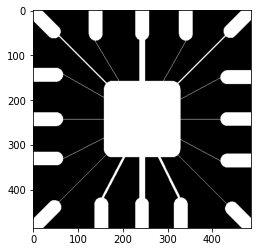

In [ ]:
#Read the image for erosion
img1= cv2.imread("/content/Fig0905(a)(wirebond-mask).tif",0)
m,n= img1.shape #Acquire size of the image
plt.imshow(img1, cmap="gray")

In [ ]:
# Define the structuring element
# k= 11,15,45 -Different sizes of the structuring element
k=15
SE= np.ones((k,k), dtype=np.uint8)
constant= (k-1)//2

In [ ]:
#Define new image
imgErode= np.zeros((m,n), dtype=np.uint8)

True

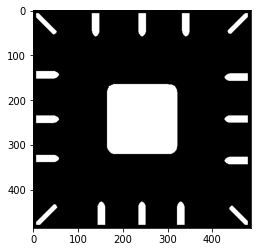

In [ ]:
#Erosion without using inbuilt cv2 function for morphology
for i in range(constant, m-constant):
  for j in range(constant,n-constant):
    temp= img1[i-constant:i+constant+1, j-constant:j+constant+1]
    product= temp*SE
    imgErode[i,j]= np.min(product)

plt.imshow(imgErode,cmap="gray")
cv2.imwrite("Eroded3.png", imgErode)

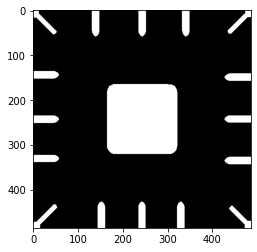

In [ ]:
#Erosion using cv2 inbuilt function to obtain structuring element and perform erosion
SE1= cv2.getStructuringElement(cv2.MORPH_RECT,(15,15))
imgErodenew= cv2.erode(img1,SE1,1)
plt.imshow(imgErodenew,cmap="gray")

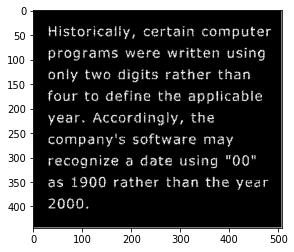

In [ ]:
#Read the image for dilation
img2= cv2.imread("/content/Fig0907(a)(text_gaps_1_and_2_pixels).tif",0)
p,q= img2.shape
plt.imshow(img2, cmap="gray")
#cv2.imwrite("text.png", img2)

In [ ]:
img_new= cv2.imread("/content/Fig0907(a)(text_gaps_1_and_2_pixels).tif",0)
cv2.imwrite("text.png",  img_new)

True

In [ ]:
#Define new image for dilation
imgDilate= np.zeros((p,q), dtype=np.uint8)

In [ ]:
#Define the structuring element 
SED= np.array([[0,1,0], [1,1,1],[0,1,0]])
constant1=1

True

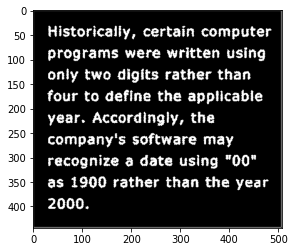

In [ ]:
#Dilation
for i in range(constant1, p-constant1):
  for j in range(constant1,q-constant1):
    temp= img2[i-constant1:i+constant1+1, j-constant1:j+constant1+1]
    product= temp*SED
    imgDilate[i,j]= np.max(product)

plt.imshow(imgDilate,cmap="gray")
cv2.imwrite("Dilated.png", imgDilate)

In [ ]:
#Use of opening and closing for morphological filtering
#Perform the following operation on the noisy fingerprint image
# [(((AoB)d B) e B)]

#AoB= (A e B) d B
#o=opening, e=erosion,d=dilation
# Here inbuilt function of erosion and dilation from cv2 module is used.
#To form the structuring element also, inbuilt function from cv2 is used

In [ ]:
#Function for erosion
def erosion(img, SE):
  imgErode= cv2.erode(img,SE,1)
  return imgErode

In [ ]:
#Function for dilation
def dilation(img, SE):
  imgDilate= cv2.dilate(img,SE,1)
  return imgDilate

True

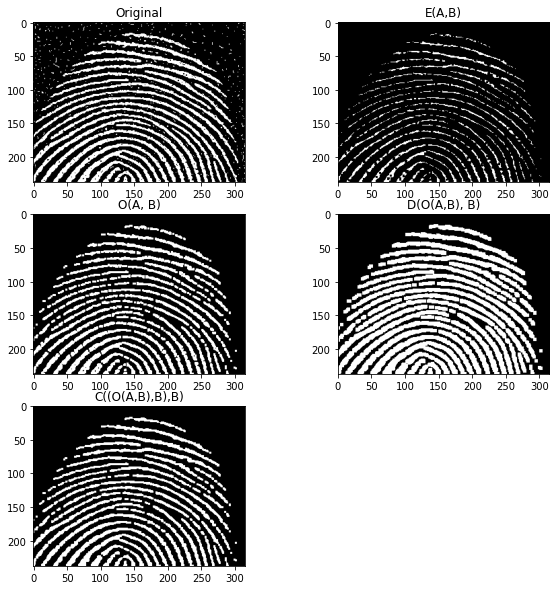

In [ ]:
#Read the image for dilation
img= cv2.imread("/content/Fig0911(a)(noisy_fingerprint).tif",0)
img_finger=cv2.imwrite("finger.png", img)
SE= cv2.getStructuringElement(cv2.MORPH_RECT,(3,3)) #Define the structuring element using inbuilt CV2 function
AeB= erosion(img,SE) #Erode the image
AoB= dilation(AeB, SE) #Dilate the eroded image. This gives opening oepration
AoBdB= dilation(AoB,SE) #dilate the opened image followed by ersoion. This will give closing of the openeed image
AoBdBeB= erosion(AoBdB, SE)
plt.figure(figsize=(10,10))
plt.subplot(3,2,1)
plt.imshow(img, cmap="gray")
plt.title("Original")
plt.subplot(3,2,2)
plt.title("E(A,B)")
plt.imshow(AeB, cmap="gray")
plt.subplot(3,2,3)
plt.title("O(A, B)")
plt.imshow(AoB, cmap="gray")
plt.subplot(3,2,4)
plt.title("D(O(A,B), B)")
plt.imshow(AoBdB, cmap="gray")
plt.subplot(3,2,5)
plt.title("C((O(A,B),B),B)")
plt.imshow(AoBdBeB, cmap="gray")
cv2.imwrite("finger_filtered.png", AoBdBeB)

k=45

In [ ]:
# Define the structuring element
# k= 11,15,45 -Different sizes of the structuring element
k=45
SE= np.ones((k,k), dtype=np.uint8)
constant1= (k-1)//2

In [ ]:
#Define new image
imgErode1= np.zeros((m,n), dtype=np.uint8)

True

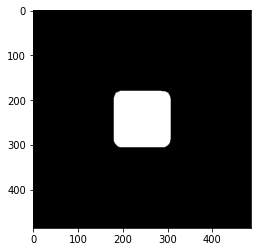

In [ ]:
#Erosion without using inbuilt cv2 function for morphology
for i in range(constant1, m-constant1):
  for j in range(constant1,n-constant1):
    temp= img1[i-constant1:i+constant1+1, j-constant1:j+constant1+1]
    product= temp*SE
    imgErode1[i,j]= np.min(product)

plt.imshow(imgErode1,cmap="gray")
cv2.imwrite("Eroded4.png", imgErode1)

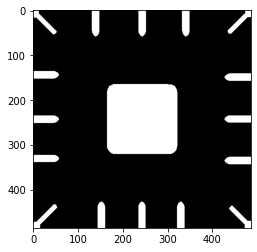

In [ ]:
#Erosion using cv2 inbuilt function to obtain structuring element and perform erosion
SE1= cv2.getStructuringElement(cv2.MORPH_RECT,(15,15))
imgErodenew1= cv2.erode(img1,SE1,1)
plt.imshow(imgErodenew1,cmap="gray")

k=11

In [ ]:
# Define the structuring element
# k= 11,15,45 -Different sizes of the structuring element
k=11
SE= np.ones((k,k), dtype=np.uint8)
constant2= (k-1)//2

In [ ]:
#Define new image
imgErode2= np.zeros((m,n), dtype=np.uint8)

True

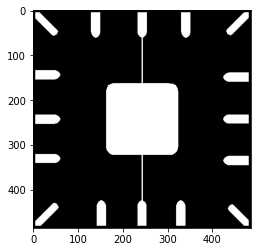

In [ ]:
#Erosion without using inbuilt cv2 function for morphology
for i in range(constant2, m-constant2):
  for j in range(constant2,n-constant2):
    temp= img1[i-constant2:i+constant2+1, j-constant2:j+constant2+1]
    product= temp*SE
    imgErode2[i,j]= np.min(product)

plt.imshow(imgErode2,cmap="gray")
cv2.imwrite("Eroded5.png", imgErode1)

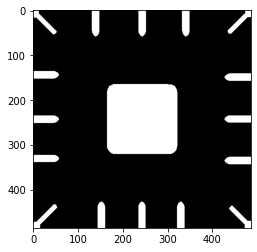

In [ ]:
#Erosion using cv2 inbuilt function to obtain structuring element and perform erosion
SE1= cv2.getStructuringElement(cv2.MORPH_RECT,(15,15))
imgErodenew2= cv2.erode(img1,SE1,1)
plt.imshow(imgErodenew2,cmap="gray")

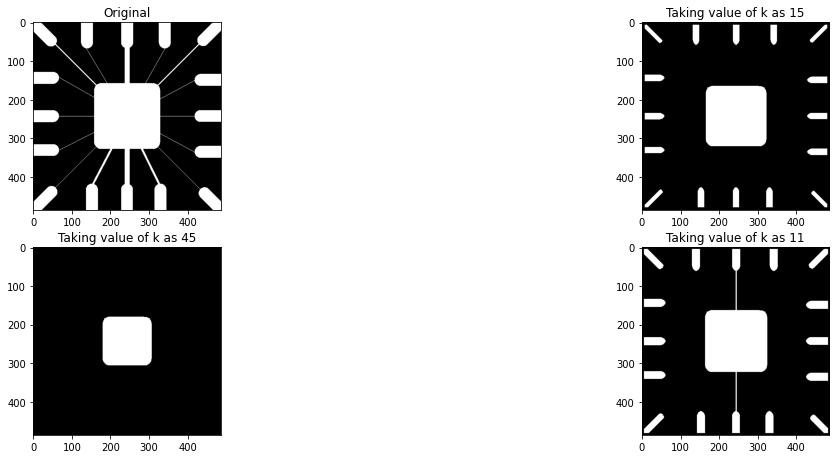

In [ ]:
plt.figure(figsize=(20,20))
plt.subplot(5,2,1)
plt.imshow(img1, cmap="gray")
plt.title("Original")

plt.subplot(5,2,2)
plt.imshow(imgErode, cmap="gray")
plt.title("Taking value of k as 15")

plt.subplot(5,2,3)
plt.imshow(imgErode1, cmap="gray")
plt.title("Taking value of k as 45")

plt.subplot(5,2,4)
plt.title("Taking value of k as 11")
plt.imshow(imgErode2, cmap="gray")


As you increase the value of k the image is getting more and more eroded.

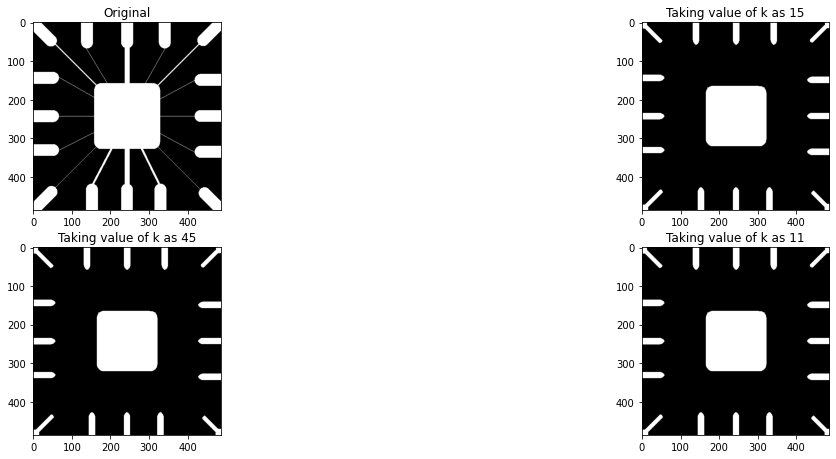

In [ ]:
plt.figure(figsize=(20,20))
plt.subplot(5,2,1)
plt.imshow(img1, cmap="gray")
plt.title("Original")

plt.subplot(5,2,2)
plt.imshow(imgErodenew, cmap="gray")
plt.title("Taking value of k as 15")

plt.subplot(5,2,3)
plt.imshow(imgErodenew1, cmap="gray")
plt.title("Taking value of k as 45")

plt.subplot(5,2,4)
plt.title("Taking value of k as 11")
plt.imshow(imgErodenew2, cmap="gray")

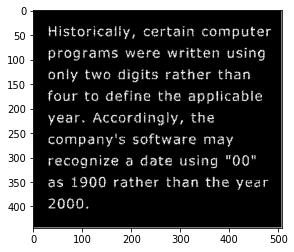

In [ ]:
#Read the image for dilation
img2= cv2.imread("/content/Fig0907(a)(text_gaps_1_and_2_pixels).tif",0)
p,q= img2.shape
plt.imshow(img2, cmap="gray")
#cv2.imwrite("text.png", img2)

In [ ]:
img_new1= cv2.imread("/content/Fig0907(a)(text_gaps_1_and_2_pixels).tif",0)
cv2.imwrite("text.png",  img_new1)

True

In [ ]:
#Define new image for dilation
imgDilate1= np.zeros((p,q), dtype=np.uint8)

In [ ]:
#Define the structuring element 
SED= np.array([[0,1,0], [1,1,1],[0,1,0]])
constant1=1

True

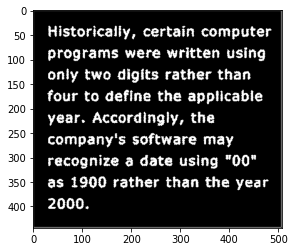

In [ ]:
#Dilation
for i in range(constant1, p-constant1):
  for j in range(constant1,q-constant1):
    temp= img2[i-constant1:i+constant1+1, j-constant1:j+constant1+1]
    product= temp*SED
    imgDilate1[i,j]= np.max(product)

plt.imshow(imgDilate1,cmap="gray")
cv2.imwrite("Dilated1.png", imgDilate1)

In [ ]:
img_new2= cv2.imread("/content/Fig0907(a)(text_gaps_1_and_2_pixels).tif",0)
cv2.imwrite("text.png",  img_new2)

True

In [ ]:
#Define new image for dilation
imgDilate2= np.zeros((p,q), dtype=np.uint8)

In [ ]:
#Define the structuring element 
SED= np.array([[1,1,1], [1,1,1],[1,1,1]])
constant2=1

True

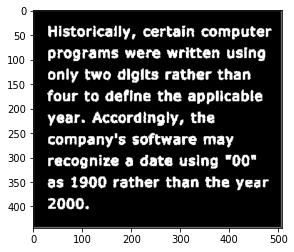

In [ ]:
#Dilation
for i in range(constant2, p-constant2):
  for j in range(constant2,q-constant2):
    temp= img2[i-constant2:i+constant2+1, j-constant2:j+constant2+1]
    product= temp*SED
    imgDilate2[i,j]= np.max(product)

plt.imshow(imgDilate2,cmap="gray")
cv2.imwrite("Dilated2.png", imgDilate2)

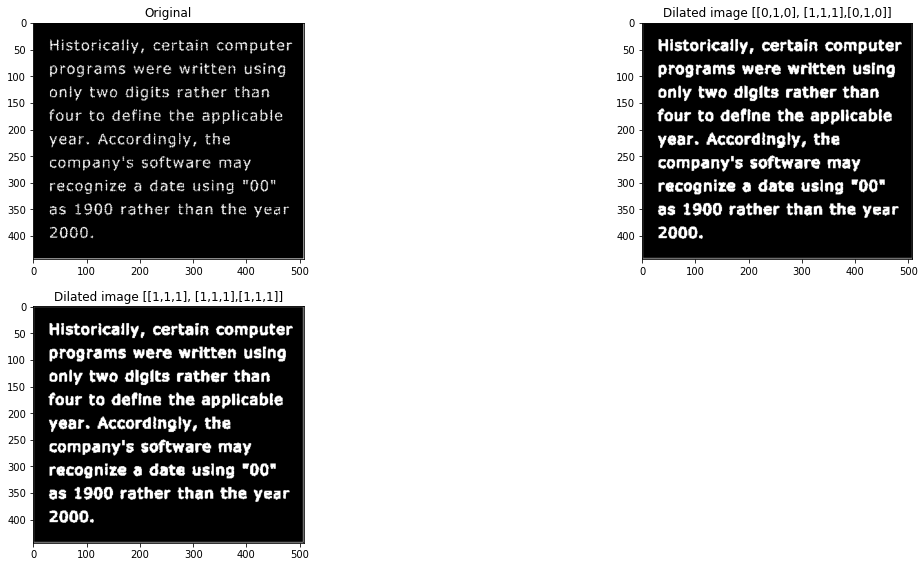

In [ ]:
plt.figure(figsize=(20,20))
plt.subplot(4,2,1)
plt.imshow(img2, cmap="gray")
plt.title("Original")
plt.subplot(4,2,2)
plt.title("Dilated image [[0,1,0], [1,1,1],[0,1,0]]")
plt.imshow(imgDilate1, cmap="gray")
plt.subplot(4,2,3)
plt.title("Dilated image [[1,1,1], [1,1,1],[1,1,1]]")
plt.imshow(imgDilate2, cmap="gray")

Thus by changing different values of the dilated image we get from not so clear text to a more and more clear text

In [ ]:
#Function for erosion
def erosion(img, SE):
  imgErode1= cv2.erode(img,SE,1)
  return imgErode1

In [ ]:
#Function for dilation
def dilation(img, SE):
  imgDilate1= cv2.dilate(img,SE,1)
  return imgDilate1

True

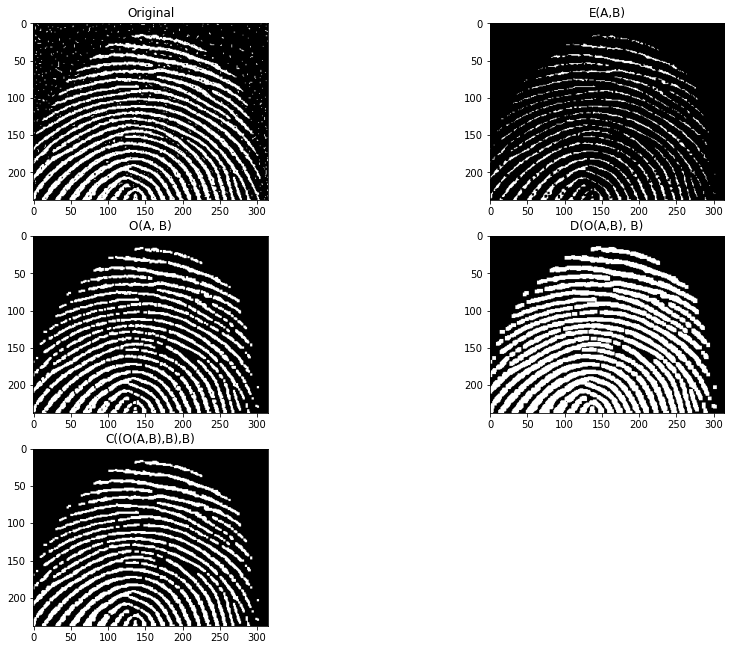

In [ ]:
#Read the image for dilation
img= cv2.imread("/content/Fig0911(a)(noisy_fingerprint).tif",0)
img_finger=cv2.imwrite("finger.png", img)
SE= cv2.getStructuringElement(cv2.MORPH_RECT,(3,3)) #Define the structuring element using inbuilt CV2 function
AeB= erosion(img,SE) #Erode the image
AoB= dilation(AeB, SE) #Dilate the eroded image. This gives opening oepration
AoBdB= dilation(AoB,SE) #dilate the opened image followed by ersoion. This will give closing of the openeed image
AoBdBeB= erosion(AoBdB, SE)
plt.figure(figsize=(15,15))
plt.subplot(4,2,1)
plt.imshow(img, cmap="gray")
plt.title("Original")
plt.subplot(4,2,2)
plt.title("E(A,B)")
plt.imshow(AeB, cmap="gray")
plt.subplot(4,2,3)
plt.title("O(A, B)")
plt.imshow(AoB, cmap="gray")
plt.subplot(4,2,4)
plt.title("D(O(A,B), B)")
plt.imshow(AoBdB, cmap="gray")
plt.subplot(4,2,5)
plt.title("C((O(A,B),B),B)")
plt.imshow(AoBdBeB, cmap="gray")
cv2.imwrite("finger_filtered.png", AoBdBeB)